## 지도학습 vs 비지도학습
- 지도학습 : 종속변수가 존재하는 것
  + 독립변수(=설명변수) : 아버지의 키, 공부시간 - 영향을 줌
  + 종속변수(=반응변수) : 자녀의 키, 성적 - 영향을 받음
- 비지도학습 : 종속변수가 존재하지 않는 것
- 두 가지 모두 예측
  + 지도학습 : 수치, 범주(남/여, 동물의 종분류, 암진단, 코로나 진단 등) 예측
  + 비지도학습 : 군집, 시각화 등

## 머신러닝 / 딥러닝의 흐름
- 1단계 : 데이터를 불러오기
  + 내장 데이터
  + 대회 데이터
  + 실무) DB에서 데이터 끌어오기
  + 실무) 크롤링(API) 데이터를 끌어오기
- 2단계 : 데이터를 가공
- 전체 공정이 100이라 가정할 시, 1~2단계가 전체 공정의 70%정도 차지
- 3단계 : 데이터셋 분리
  + 훈련데이터 / 테스트데이터
  + 통계적인 기법을 활용하면서 분리
- 4단계 : 머신러닝 파이프라인 구축(자동화)
- 5단계 : 모델 생성
- 6단계 : 하이퍼 파라미터 튜닝
- 7단계 : 최종 모델 만듬
- 8단계 : 모형 예측
- 9단계 : 모형 성능 결과 시각화


## 설정

In [1]:
# matplotlib 최신 버전 업데이트
!pip install matplotlib -U

# 설치후 런타임 재시작

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 32.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


- 시각화 옵션 설정

In [2]:
import seaborn as sns

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('colorblind')

## 데이터 불러오기
- seaborn 라이브러리에 있는 펭귄 데이터를 불러온다.

In [3]:
pen_df = sns.load_dataset('penguins')
# pen_df.head()
pen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 데이터 가공
- 결측치, NULL값 제거
- 인덱스 번호 재정렬

In [4]:
pen_df = pen_df.dropna().reset_index(drop=True)
pen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


- 펭귄의 종을 분류
  + 부리의 길이, 두께, 팔 길이, 몸무게
    - 팔길이 181, 몸무게 3750 - 수치 조정 필요

In [5]:
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [6]:
pen_df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

## 데이터셋 분리
- 훈련데이터와 검증데이터로 분리하는 코드를 작성한다.
- 데이터셋 분리, 층화추출 방식으로 분리한다.
  + 층화추출방식 : 데이터의 비율에 맞도록 분리
  + ex) 한국인 100명 / 일본인 50명 => 70:30 = 35:15 / 25:25 X - 50:25 O 
- scikit-learn : https://scikit-learn.org/stable/
  + Classification : 분류
  + Regression : 수치
  + Clustering : 비지도학습
    - 3가지 기억
    - Linear 모델
      + Ordinary Least Squares (일반 회귀)
      + Logistic Regression (Logistic 회귀)
    - Decision Trees (결정 나무)

In [7]:
from sklearn.model_selection import train_test_split

# 종속변수
y = pen_df['body_mass_g']

# 독립변수
X = pen_df.drop('body_mass_g', axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=X[['species', 'island', 'sex']])
# test_size : 나누는 비율(0.0 ~ 1.0)
# stratify : 클래스 레이블 분포 비율을 맞춰줌

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((266, 6), (67, 6), (266,), (67,))

## 머신러닝 파이프라인 구축
- 키워드 : Feature Engineering ( http://www.yes24.com/Product/Goods/67472798 / 원서 내용은 무료로 볼수 있음)
  + 머신러닝 알고리즘에 적확한(accurate) 데이터를 입력
  + 문자데이터가 있으면 수치로 변환
  + 수치데이터 변환

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

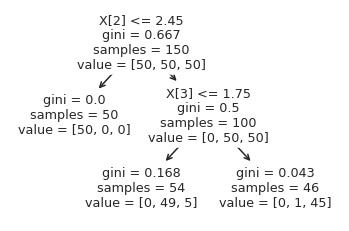

In [38]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [18]:
# def self_intro(firstname = None, lastname = None):
#   print(firstname, lastname)

# self_intro("evan", "jung")
# self_intro('ss', 20)
# self_intro('m', 'p', 21) # 매개변수가 달라 오류

# = 받은 데이터를 그대로 전달 =>
def self_intro(**data):
  print("Data Type:", type(data))

  # dictionary를 이용한 반복문
  for key, value in data.items():
    print(f'{key}, {value}')

self_intro(firstname = 'evan', age = 10)
self_intro(firstname = 'evan', lastname = 'park', age = 30)
self_intro(firstname = 'min', lastname = 'park', country = '한국')
self_intro(song = 'After Like')

Data Type: <class 'dict'>
firstname, evan
age, 10
Data Type: <class 'dict'>
firstname, evan
lastname, park
age, 30
Data Type: <class 'dict'>
firstname, min
lastname, park
country, 한국
Data Type: <class 'dict'>
song, After Like


### 원핫인코딩
- OneHot Encoding
- Ordinal Encoding  ┓
- Label Encoding　┻ 서열 척도

- 문자열의 특징 (통계 관점)
- 명목척도, 서열척도
  + 명목척도 : 서열을 측정할 수 없는 문자 데이터
    - 예) 한국인, 중국인, 일본인 / 시도
  + 서열척도 : 서열을 측정할 수 있는 문자 데이터
    - 예) 성적 등급, 상품 등급

In [ ]:
# 명목척도
#           한국인  중국인  일본인
# 한국인      1       0       0
# 중국인      0       1       0
# 일본인      0       0       1

# 서열척도
# 수능 1등급 --> 9
# 수능 9등급 --> 1

In [42]:
# 문자 데이터를 수치로 변환
from sklearn.preprocessing import OneHotEncoder

# 수치 데이터의 단위를 표준화 (0, 1)
from sklearn.preprocessing import StandardScaler

# 파이프라인 구축을 위한 주요 함수
# 수치 컬럼, 문자열 컬럼 구분 지정해야함
from sklearn.compose import ColumnTransformer

# 파이프라인
from sklearn.pipeline import Pipeline

# 머신러닝 알고리즘
# 3가지 알고리즘은 Decision Trees에 기반함
from sklearn.ensemble import RandomForestRegressor # 2001?
from xgboost import XGBRegressor # 2016?
from lightgbm import LGBMRegressor # 2017?

def get_model(method = 'rf',
              cat_features = ['species', 'island', 'sex'],
              mum_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
              **kwargs):
    # 모델 별로 가지고 있는 매개 변수 갯수가 다름
    # **kwargs : 가진 파라미터 전부 포함

  # 문자 데이터를 one-hot인코딩에 적용
  cat_transformer = OneHotEncoder()

  # 숫자 데이터를 표준화 적용
  num_transformer = StandardScaler()

  # 각 데이터별 전처리 적용
  preprocessor = ColumnTransformer([('cat', cat_transformer, cat_features), 
                                    ('num', num_transformer, mum_features)])
  
  # 전처리 후 머신러닝 알고리즘 적용
  if method == 'rf':
    ml = ('ml', RandomForestRegressor(**kwargs))
  elif method == 'lgbm':
    ml = ('ml', LGBMRegressor(**kwargs))
  elif method == 'xgb':
    ml = ('ml', XGBRegressor(**kwargs))
  else:
    print('알고리즘 없음')
    
  
  # 파이프라인 연결
  pipeline = Pipeline(steps=[('preprocessor', preprocessor), ml])
  return pipeline

## 모델 생성
- RandomForest 알고리즘 불러와서 모델 생성

In [43]:
from sklearn import set_config
set_config(display = 'diagram')

In [44]:
model = get_model(method = 'rf', random_state=0)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('ml', RandomForestRegressor(random_state=0))])

## 하이퍼 파라미터 튜닝
- Grid Search
  + 해당 범위 및 Step의 모든 경우의 수 탐색
  + 범위를 넓게, Step를 작게 설정할수록 최적해 찾을 가능성은 높아지지만 시간이 오래걸림.
  + 일반적으로 넓은 범위와 큰 Step으로 설정한 후 범위를 좁혀나가는 방식으로 시간 단축
- Random Search
  + 정해진 범위 내에서 Random하게 선택
  + 기본적으로 더 빠르고 효율적 - Grid Search보다 권장되는 방법
  + Grid Search보다 속도가 빠르지만 최적해가 아닐 수 있음
  + Sample의 수가 많다면 Random Sampling을 통해 최적해 찾을 가능성이 높아짐
- 최신기법 : https://optuna.org/

In [31]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats # 통계 관련 패키지

# parameter distribution
params = {"ml__n_estimators": stats.randint(100, 300),   # [100, 200, 300]
          "ml__max_depth": stats.randint(3, 10),         # [3, 5, 10],
          "ml__min_samples_leaf": stats.randint(1, 10),  # [1, 3, 5, 7, 10]
          "ml__max_features": stats.uniform(0, 1),       # ["auto", "sqrt", "log2"]
          } # 정수, 문자, 확률를 알맞게 넣으면 충분?

model = get_model(method = 'rf', random_state=0) # method : rf, xgb, lgbm
rscv = RandomizedSearchCV(model, param_distributions=params, n_iter = 30, scoring = 'r2', refit = 'r2')
# 경우의 수 동작 - 자동화 / n_iter = 30 : 30번 반복

In [32]:
# 모델 학습
rscv.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(),
                                                                               ['species',
                                                                                'island',
                                                                                'sex']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['bill_length_mm',
                                                                                'bill_depth_mm',
                                                                                'flipper_length_mm'])])),
                                             ('ml',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=30,
                   param_distributions={'ml__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbae32a17f0>,
                                        'ml__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbae32a1be0>,
                                        'ml__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbae32a5430>,
                                        'ml__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbae32a5460>},
                   refit='r2', scoring='r2')

In [33]:
import pandas as pd
pd.DataFrame.from_dict(rscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ml__max_depth,param_ml__max_features,param_ml__min_samples_leaf,param_ml__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.117275,0.003115,0.011125,0.000239,6,0.486626,7,110,"{'ml__max_depth': 6, 'ml__max_features': 0.486...",0.878094,0.841503,0.850846,0.838216,0.892915,0.860315,0.021498,8
1,0.237865,0.003118,0.020004,0.001266,5,0.013017,8,242,"{'ml__max_depth': 5, 'ml__max_features': 0.013...",0.843687,0.828600,0.814000,0.841121,0.870015,0.839485,0.018549,27
2,0.258909,0.006515,0.019715,0.000172,4,0.833885,5,239,"{'ml__max_depth': 4, 'ml__max_features': 0.833...",0.877977,0.845251,0.853787,0.837016,0.894805,0.861767,0.021463,3
3,0.153453,0.004899,0.013998,0.000267,3,0.156047,1,158,"{'ml__max_depth': 3, 'ml__max_features': 0.156...",0.826332,0.822873,0.817324,0.845127,0.859429,0.834217,0.015690,30
4,0.102543,0.002873,0.010591,0.000556,5,0.093405,9,101,"{'ml__max_depth': 5, 'ml__max_features': 0.093...",0.839736,0.819089,0.813254,0.840732,0.862150,0.834992,0.017427,29
5,0.243691,0.002553,0.019240,0.000075,3,0.713887,9,238,"{'ml__max_depth': 3, 'ml__max_features': 0.713...",0.873737,0.836275,0.848263,0.834107,0.888705,0.856217,0.021504,21
6,0.281228,0.003176,0.025941,0.005016,9,0.276238,9,282,"{'ml__max_depth': 9, 'ml__max_features': 0.276...",0.873926,0.836928,0.834638,0.847067,0.882684,0.855049,0.019640,24
7,0.269869,0.007200,0.020440,0.000743,5,0.975019,7,245,"{'ml__max_depth': 5, 'ml__max_features': 0.975...",0.875091,0.837304,0.850386,0.834732,0.893592,0.858221,0.022744,14
8,0.229825,0.004452,0.018602,0.000950,6,0.64881,9,220,"{'ml__max_depth': 6, 'ml__max_features': 0.648...",0.879147,0.836816,0.849468,0.835426,0.890772,0.858326,0.022591,13
9,0.284082,0.004541,0.022775,0.000480,8,0.363037,8,292,"{'ml__max_depth': 8, 'ml__max_features': 0.363...",0.874284,0.839114,0.842289,0.846331,0.885349,0.857473,0.018716,17


## 모형 예측
- 주어진 하이퍼 파라미터 튜닝이 적용된 모델을 활용하여 예측해보자

In [35]:
y_pred_train = rscv.predict(X_train)
y_pred_val = rscv.predict(X_val)

y_pred_train[:3], y_pred_val[:3]

(array([4632.75699762, 3617.50767141, 3312.54073111]),
 array([4270.97772983, 4305.26421388, 4125.30357046]))

## 모형 성능 평가

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

c_train = "g"
c_val = "m"

def get_parity(y_train, y_val, y_pred_train, y_pred_val):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5.5), constrained_layout=True, sharex=True, sharey=True)
    for ax, y_true, y_pred, c, title in zip(axs, [y_train, y_val], [y_pred_train, y_pred_val], [c_train, c_val], ["train", "valid"]):
        ax.scatter(y_true, y_pred, c=c)
        ax.set_xlabel("true", color="gray", labelpad=12)
        if ax == axs[0]:
            ax.set_ylabel("prediction", color="gray", labelpad=12)
        ax.set_title(title, color="gray", pad=12)

        r2 = r2_score(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)

        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        limmin = min(xmin, ymin)
        limmax = max(xmax, ymax)
        ax.plot([limmin, limmax], [limmin, limmax], c="k", alpha=0.5)
        ax.set_xlim(limmin, limmax)
        ax.set_ylim(limmin, limmax)

        ax.text(0.95, 0.05, f"R2 = {r2:.3f}\nRMSE = {rmse:.3f}", ha="right", transform=ax.transAxes, fontsize=16)
    return fig, r2

- 예측된 모형 결과값을 가져와서 시각화로 보여주기

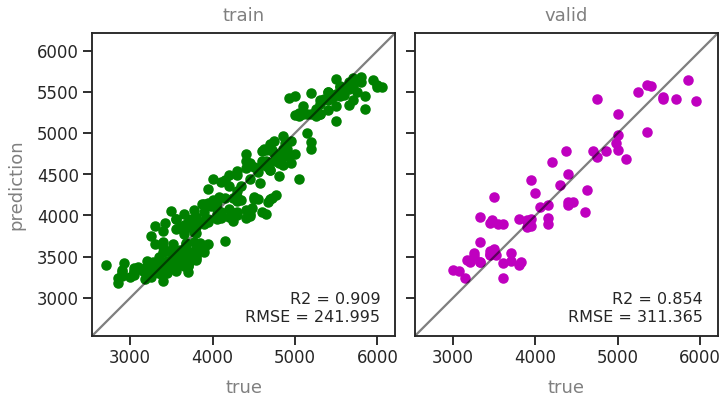

In [37]:
fig, r2_default = get_parity(y_train, y_val, y_pred_train, y_pred_val)

In [ ]:
# train - 학습 / valid - 검증
# true : 실제 데이터
# prediction : 예측 값
#   R2 : 예측의 적합도 (0 ~ 1)
#  MSE : 오차값 제곱 후 평균 / MAE : 오차값을 절대값 후 평균 / RMSE : MSE에 루트 적용
# 오차 수치가 적을수록 좋은 모델 / 오차가 심한 경우 데이터 가공부터 재시작 - 재가공 후 오차가 싶할 경우 데이터 추가하는 방법도 있음
# 1. 좋은 모델인가? 
# R2간의 수치 차이가 적을수록 좋은 모델 (안정적인 모델)
# train과 valid의 오차가 큰경우 과대적합 / 과대적합 : 모델이 훈련 세트에 과하게 적합한 상태가 되어 일반성이 떨어지는 현상

## 모형 개발 팁
- 1단계 : 베이스라인 코드 (기준모델)
- 2단계 : 여러 모형 비교
- 3단계 : 파생변수 (논리적인 방식으로) 생성
- 4단계 : 1~3단계 무한 반복